# Install Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load & Clean Data

In [11]:
df = pd.read_csv('retail_sample_dataset.csv', encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,17270,1419,Jeans,5,2011-09-18,195.07,10020,United Kingdom
1,10860,1021,Sunglasses,7,2011-09-06,118.98,10103,Spain
2,15390,1205,Shoes,7,2011-08-28,91.98,10078,Italy
3,15191,1638,Shoes,6,2010-07-26,48.44,10036,Spain
4,15734,1847,Sunglasses,8,2010-08-17,132.42,10044,Italy
...,...,...,...,...,...,...,...,...
4995,14427,1023,Perfume,8,2011-10-17,14.65,10169,France
4996,16135,1955,Watch,7,2010-12-17,176.90,10034,France
4997,15573,1862,Watch,1,2010-03-02,71.93,10118,United Kingdom
4998,14131,1310,Sunglasses,4,2010-09-20,171.99,10033,Germany


In [12]:
#remove the duplicates
df.drop_duplicates(inplace=True)

In [14]:
df = df.dropna(subset=['CustomerID'])

In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,17270,1419,Jeans,5,2011-09-18,195.07,10020,United Kingdom
1,10860,1021,Sunglasses,7,2011-09-06,118.98,10103,Spain
2,15390,1205,Shoes,7,2011-08-28,91.98,10078,Italy
3,15191,1638,Shoes,6,2010-07-26,48.44,10036,Spain
4,15734,1847,Sunglasses,8,2010-08-17,132.42,10044,Italy
...,...,...,...,...,...,...,...,...
4995,14427,1023,Perfume,8,2011-10-17,14.65,10169,France
4996,16135,1955,Watch,7,2010-12-17,176.90,10034,France
4997,15573,1862,Watch,1,2010-03-02,71.93,10118,United Kingdom
4998,14131,1310,Sunglasses,4,2010-09-20,171.99,10033,Germany


In [28]:
#handle Cancellation
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,17270,1419,Jeans,5,2011-09-18,195.07,10020,United Kingdom,975.35
1,10860,1021,Sunglasses,7,2011-09-06,118.98,10103,Spain,832.86
2,15390,1205,Shoes,7,2011-08-28,91.98,10078,Italy,643.86
3,15191,1638,Shoes,6,2010-07-26,48.44,10036,Spain,290.64
4,15734,1847,Sunglasses,8,2010-08-17,132.42,10044,Italy,1059.36
5,16265,1956,Sunglasses,3,2011-08-06,138.69,10141,Germany,416.07
6,10466,1355,T-shirt,1,2010-12-08,138.61,10042,France,138.61
7,14426,1439,T-shirt,3,2011-04-05,10.26,10115,France,30.78
8,15578,1728,Bag,2,2010-05-16,180.33,10084,Italy,360.66
9,18322,1095,Bag,2,2010-10-11,70.93,10083,Germany,141.86


In [30]:
#convert date into proper format
date = df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
date.head(10)

,InvoiceDate
0,2011-09-18
1,2011-09-06
2,2011-08-28
3,2010-07-26
4,2010-08-17
5,2011-08-06
6,2010-12-08
7,2011-04-05
8,2010-05-16
9,2010-10-11


In [21]:
display(df.head(10))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,17270,1419,Jeans,5,2011-09-18,195.07,10020,United Kingdom
1,10860,1021,Sunglasses,7,2011-09-06,118.98,10103,Spain
2,15390,1205,Shoes,7,2011-08-28,91.98,10078,Italy
3,15191,1638,Shoes,6,2010-07-26,48.44,10036,Spain
4,15734,1847,Sunglasses,8,2010-08-17,132.42,10044,Italy
5,16265,1956,Sunglasses,3,2011-08-06,138.69,10141,Germany
6,10466,1355,T-shirt,1,2010-12-08,138.61,10042,France
7,14426,1439,T-shirt,3,2011-04-05,10.26,10115,France
8,15578,1728,Bag,2,2010-05-16,180.33,10084,Italy
9,18322,1095,Bag,2,2010-10-11,70.93,10083,Germany


In [22]:
# df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Exploratory DataAnalysis

In [25]:
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_selling_products

,Quantity
Description,
Jeans,3699
T-shirt,3614
Shoes,3556
Bag,3545
Perfume,3509
Watch,3448
Sunglasses,3409


In [33]:
#Analyze sales trends

sales_trend = df.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum()
sales_trend

,TotalPrice
InvoiceDate,
2010-01-31,125126.26
2010-02-28,91211.98
2010-03-31,121491.12
2010-04-30,91971.03
2010-05-31,111739.91
2010-06-30,121568.80
2010-07-31,98198.17
2010-08-31,111360.32
2010-09-30,99693.43


In [35]:
# Country contribution
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_sales

,TotalPrice
Country,
France,547631.39
Italy,528192.69
Spain,498817.23
Germany,489732.40
United Kingdom,461896.80


In [42]:
# Customer metrics
total_revenue = df['TotalPrice'].sum()
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()

total_revenue, total_orders, total_customers

(np.float64(2526270.51), 3885, 200)

In [41]:
AOV = total_revenue / total_orders
Purchase_Frequency = total_orders / total_customers
Revenue_per_Customer = total_revenue / total_customers
Revenue_per_Customer

np.float64(12631.35255)

## RFM Analysis

In [43]:
NOW = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
'InvoiceDate': lambda x: (NOW - x.max()).days,
'InvoiceNo': 'nunique',
'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


# RFM Scoring
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])


rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm[['R_score','F_score','M_score']].astype(int).sum(axis=1)

In [44]:
display(rfm)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM_Score
0,10000,21,25,9386.45,3,3,1,331,7
1,10001,4,26,13672.32,4,3,3,433,10
2,10002,8,20,11281.87,4,1,2,412,7
3,10003,22,30,12225.68,3,4,2,342,9
4,10004,9,24,13746.69,4,2,3,423,9
...,...,...,...,...,...,...,...,...,...
195,10195,64,29,19408.59,1,4,4,144,9
196,10196,13,33,14921.50,3,4,4,344,11
197,10197,2,19,8530.94,4,1,1,411,6
198,10198,27,23,11662.00,2,2,2,222,6


# Optional Clustering

In [46]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

display(rfm_scaled)

array([[-3.33474389e-01,  5.03084561e-03, -9.75901288e-01],
       [-8.23454043e-01,  2.06264670e-01,  3.13069949e-01],
       [-7.08164713e-01, -1.00113828e+00, -4.05855565e-01],
       [-3.04652056e-01,  1.01119997e+00, -1.22005625e-01],
       [-6.79342380e-01, -1.96202979e-01,  3.35436654e-01],
       [ 3.29439262e-01,  6.08732318e-01,  2.02625370e+00],
       [-5.64053050e-01,  1.01119997e+00,  8.67398527e-01],
       [ 1.56505266e-01, -7.99904451e-01, -2.28918897e-01],
       [-1.02895728e-01, -1.40360592e+00, -1.15586349e+00],
       [-4.77586052e-01, -1.96202979e-01,  3.26591625e-01],
       [-2.18185058e-01, -1.96202979e-01, -2.40079694e-01],
       [-8.81098709e-01,  1.81613526e+00,  1.17963015e+00],
       [ 2.42972264e-01, -1.40360592e+00, -1.34247526e+00],
       [ 1.85327599e-01,  1.01119997e+00,  1.52237878e+00],
       [-4.77586052e-01,  1.21243379e+00,  9.04219231e-01],
       [ 1.04999758e+00,  8.09966142e-01, -1.50808360e-01],
       [-3.91119054e-01,  1.01119997e+00

In [48]:
# Elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

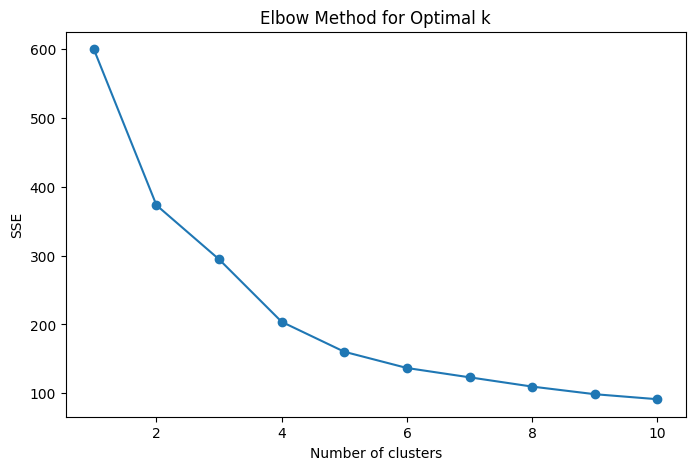

In [49]:
# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [50]:
# Choose k based on elbow point
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Business Insights

In [52]:
print("Top Products:\n", top_selling_products)
print("\nSales Trend (last months):\n", sales_trend.tail())
print("\nTop Countries:\n", country_sales.head())
print("\nMetrics -> AOV: {:.2f}, Purchase Freq: {:.2f}, Revenue/Customer: {:.2f}".format(AOV, Purchase_Frequency, Revenue_per_Customer))


print("\nRFM Segmentation Head:\n", rfm.head())

Top Products:
 Description
Jeans         3699
T-shirt       3614
Shoes         3556
Bag           3545
Perfume       3509
Watch         3448
Sunglasses    3409
Name: Quantity, dtype: int64

Sales Trend (last months):
 InvoiceDate
2011-08-31    97730.13
2011-09-30    99205.66
2011-10-31    99301.65
2011-11-30    88883.33
2011-12-31    99186.61
Freq: ME, Name: TotalPrice, dtype: float64

Top Countries:
 Country
France            547631.39
Italy             528192.69
Spain             498817.23
Germany           489732.40
United Kingdom    461896.80
Name: TotalPrice, dtype: float64

Metrics -> AOV: 650.26, Purchase Freq: 19.43, Revenue/Customer: 12631.35

RFM Segmentation Head:
    CustomerID  Recency  Frequency  Monetary R_score F_score M_score  \
0       10000       21         25   9386.45       3       3       1   
1       10001        4         26  13672.32       4       3       3   
2       10002        8         20  11281.87       4       1       2   
3       10003       22         